# Proyecto Individual 02

**Análisis Exploratorio de Datos (EDA) del Índice S&P 500**

Importamos librerias necesarias

In [332]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import pandas_datareader as pdr

Descargamos los datos del índice S&P 500 desde el 1 de enero de 2000 hasta el 23 de febrero de 2023 y los guardamos en un archivo csv.

In [21]:
sp500_data = yf.download('^GSPC', start='2000-01-01', end='2023-02-23')
sp500_data.to_csv('./dataset/SP500.csv')

[*********************100%***********************]  1 of 1 completed


In [305]:
# Leer el archivo CSV
df_sp500 = pd.read_csv('./dataset/SP500.csv')

En primer lugar, vamos a ver cómo se ven los datos utilizando la función **head()**:

In [306]:
df_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


Renombramos las columnas para que estén en español y redondeamos los valores a 2 decimales para mayor facilidad de comprension.

In [307]:
# renombramos las columnas al español
df_sp500 = df_sp500.rename(columns={
    'Date': 'Fecha',
    'Open': 'Apertura',
    'High': 'Máximo',
    'Low': 'Mínimo',
    'Close': 'Cierre',
    'Adj Close': 'Cierre Ajustado',
    'Volume': 'Volumen'
})

In [308]:
# redondear a 2 decimales
df_sp500 = df_sp500.round(2)

Podemos obtener más información del DataFrame utilizando la función **info()**:

In [309]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fecha            5822 non-null   object 
 1   Apertura         5822 non-null   float64
 2   Máximo           5822 non-null   float64
 3   Mínimo           5822 non-null   float64
 4   Cierre           5822 non-null   float64
 5   Cierre Ajustado  5822 non-null   float64
 6   Volumen          5822 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 318.5+ KB


Ahora, vamos a calcular algunas estadísticas descriptivas para tener una idea general de los datos:

In [310]:
df_sp500.describe().round(2)

,Apertura,Máximo,Mínimo,Cierre,Cierre Ajustado,Volumen
count,5822.00,5822.00,5822.00,5822.00,5822.00,5.822000e+03
mean,1886.49,1897.78,1874.26,1886.71,1886.71,3.302644e+09
std,976.76,981.89,971.19,976.89,976.89,1.522890e+09
min,679.28,695.27,666.79,676.53,676.53,3.560700e+08
25%,1184.60,1191.76,1177.14,1184.42,1184.42,1.985738e+09
50%,1434.52,1443.68,1425.54,1434.43,1434.43,3.408845e+09
75%,2390.74,2395.65,2380.30,2389.33,2389.33,4.159688e+09
max,4804.51,4818.62,4780.04,4796.56,4796.56,1.145623e+10


Esta función nos mostrará la cantidad de registros, la media, la desviación estándar, los valores mínimos y máximos y los cuartiles de cada columna del DataFrame.

Como se van a realizar operaciones que implican seleccionar, filtrar o agrupar datos según la fecha, se indexara la columna **'fecha'**

In [311]:
df_sp500 = df_sp500.set_index('Fecha')

#se convierten la columna con to_datetime
df_sp500.index = pd.to_datetime(df_sp500.index)

El precio de **cierre ajustado** tiene en cuenta cualquier evento corporativo que pueda afectar el precio de una acción o de un índice. Por ejemplo, las divisiones de acciones, las fusiones o las adquisiciones pueden afectar el precio de una acción o de un índice. El precio de cierre ajustado se calcula teniendo en cuenta estos eventos corporativos.

Graficamos la evolución del precio de cierre ajustado del S&P 500 desde el 2000 hasta el 2023.

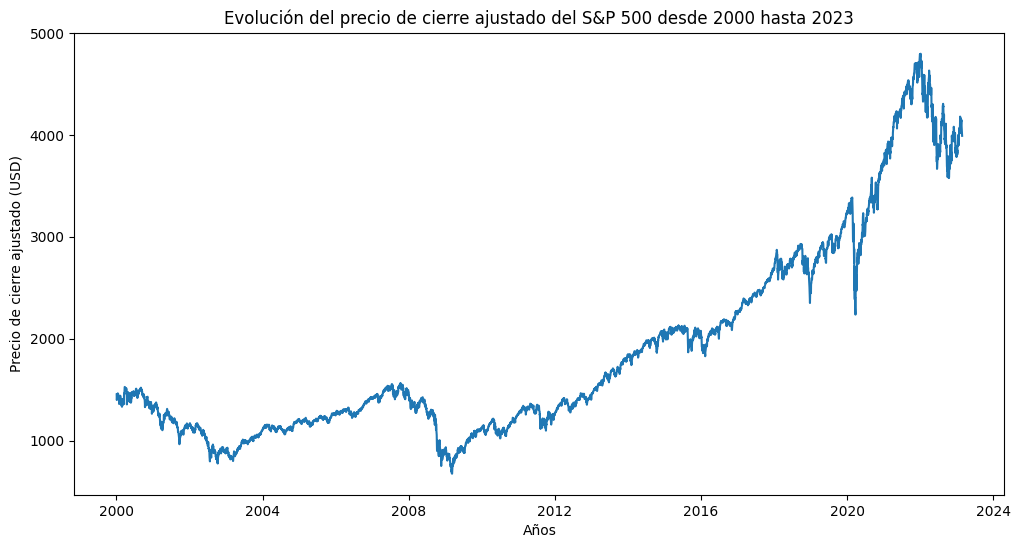

In [312]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df_sp500.index, y=df_sp500['Cierre Ajustado'])
plt.title('Evolución del precio de cierre ajustado del S&P 500 desde 2000 hasta 2023')
plt.xlabel('Años')
plt.ylabel('Precio de cierre ajustado (USD)')
plt.show()

Esta gráfica nos muestra la evolución del precio de cierre ajustado del S&P 500 a lo largo del tiempo, lo cual nos permite visualizar tendencias a largo plazo y posibles patrones.

Graficamos un histograma de los rendimientos diarios del S&P 500 para analizar su distribución y volatilidad.

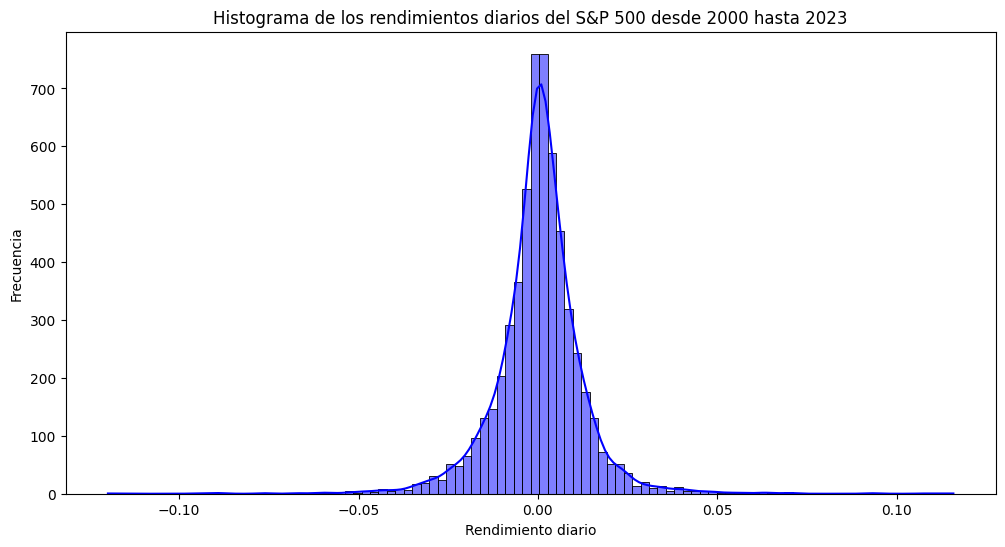

In [313]:
retorno_diario = df_sp500['Cierre Ajustado'].pct_change()
plt.figure(figsize=(12,6))
sns.histplot(retorno_diario.dropna(), kde=True, bins=100, color='blue')
plt.title('Histograma de los rendimientos diarios del S&P 500 desde 2000 hasta 2023')
plt.xlabel('Rendimiento diario')
plt.ylabel('Frecuencia')
plt.show()

Esta gráfica nos muestra la distribución de los rendimientos diarios del S&P 500, lo cual nos permite analizar la volatilidad y riesgo del índice

Graficamos un diagrama de caja de los rendimientos mensuales del S&P 500 para analizar su distribución y detectar valores atípicos.

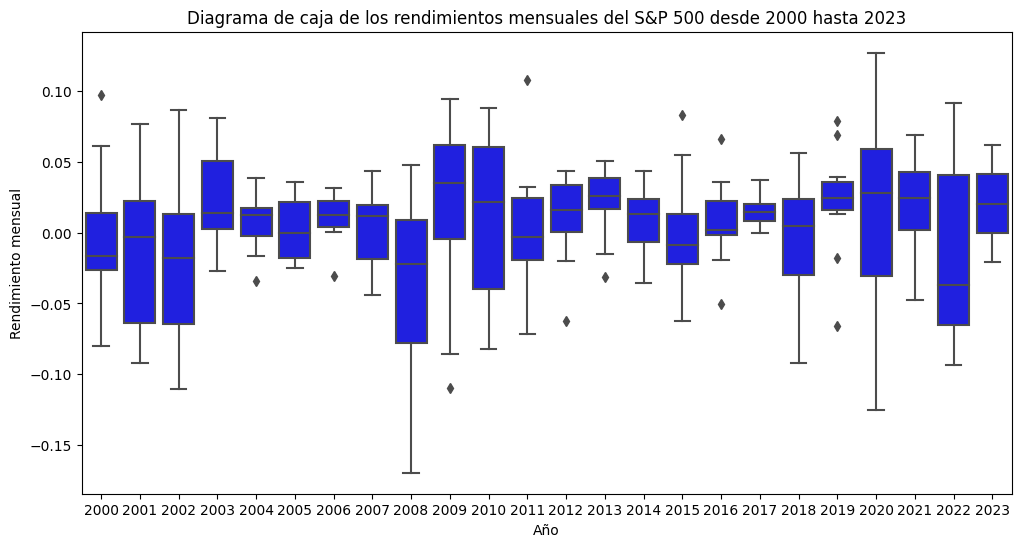

In [314]:
retorno_mensual = df_sp500['Cierre Ajustado'].resample('M').ffill().pct_change()
plt.figure(figsize=(12,6))
sns.boxplot(x=retorno_mensual.index.year, y=retorno_mensual, color='blue')
plt.title('Diagrama de caja de los rendimientos mensuales del S&P 500 desde 2000 hasta 2023')
plt.xlabel('Año')
plt.ylabel('Rendimiento mensual')
plt.show()

Para encontrar los valores atípicos en los rendimientos mensuales del S&P 500 con mas presicion hacemos lo siguiente

In [335]:
retorno_mensual_verf = df_sp500['Cierre'].resample('M').ffill().pct_change()

Q1 = retorno_mensual_verf.quantile(0.25)
Q3 = retorno_mensual_verf.quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = retorno_mensual_verf[(retorno_mensual_verf < limite_inferior) | (retorno_mensual_verf > limite_superior)]
outliers

Fecha
2002-09-30   -0.110024
2008-10-31   -0.169425
2009-02-28   -0.109931
2011-10-31    0.107723
2020-03-31   -0.125119
2020-04-30    0.126844
2020-11-30    0.107546
Name: Cierre, dtype: float64

Análisis de rendimiento y riesgo

In [318]:
# Calcular la tasa de rendimiento diaria
retorno_diario_verificacion = df_sp500['Cierre Ajustado'].pct_change()

# Calcular la volatilidad anualizada
volatilidad = retorno_diario_verificacion.std() * (252 ** 0.5)

# Calcular el rendimiento anualizado
retorno_anual = (1 + retorno_diario_verificacion.mean()) ** 252 - 1

# Calcular el perfil de riesgo
perfil_de_riesgo = retorno_anual / volatilidad

# Imprimir los resultados
print("Volatilidad anualizada:", round(volatilidad,2))
print("Rendimiento anualizado:", round(retorno_anual,2))
print("Perfil de riesgo:", round(perfil_de_riesgo,2))

Volatilidad anualizada: 0.2
Rendimiento anualizado: 0.07
Perfil de riesgo: 0.33


**Eleccion de la empresa a invertir**

Se realiza un analisis para la Empresa seleccionada

Descargamos el dataset de la empresa

In [243]:
nvda_ticker = yf.download('NVDA', start='2000-01-01', end='2023-02-23')

nvda_ticker.to_csv('./dataset/NVIDIA.csv')

[*********************100%***********************]  1 of 1 completed


In [319]:
df_nvidia = pd.read_csv('./dataset/NVIDIA.csv')

Se realizan cambios para poder exponer mejor los resultados

In [320]:
df_nvidia = df_nvidia.rename(columns={
    'Date': 'Fecha',
    'Open': 'Apertura',
    'High': 'Máximo',
    'Low': 'Mínimo',
    'Close': 'Cierre',
    'Adj Close': 'Cierre Ajustado',
    'Volume': 'Volumen'
})

In [321]:
# redondear a 2 decimales
df_nvidia = df_nvidia.round(2)

#Se indexa la columna Date
df_nvidia = df_nvidia.set_index('Fecha')

#se convierten la columna con to_datetime
df_nvidia.index = pd.to_datetime(df_nvidia.index)

Grafico del Cierre ajustado de la empresa

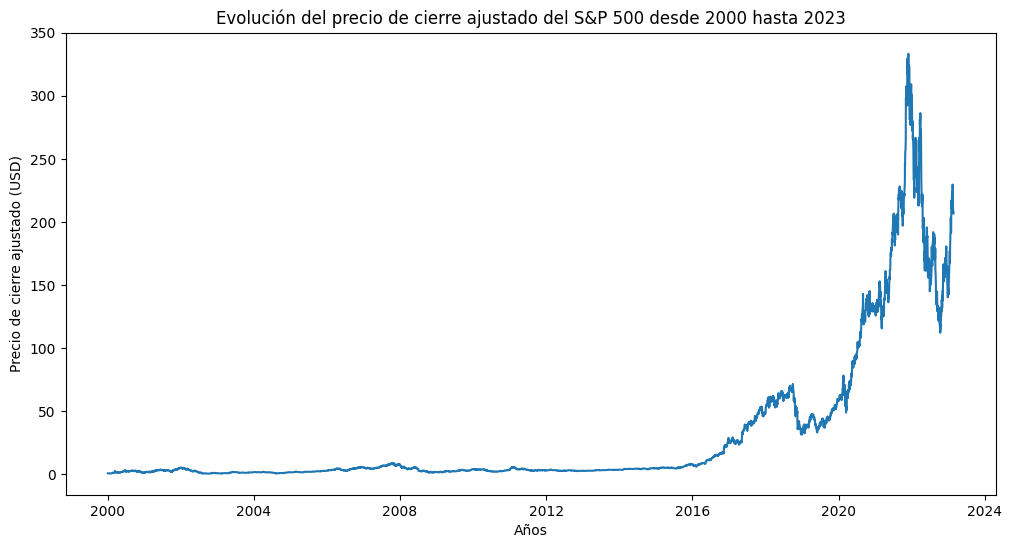

In [322]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df_sp500.index, y=df_nvidia['Cierre Ajustado'])
plt.title('Evolución del precio de cierre ajustado del S&P 500 desde 2000 hasta 2023')
plt.xlabel('Años')
plt.ylabel('Precio de cierre ajustado (USD)')
plt.show()

**KPI 1: Tasa de crecimiento anual compuesta (CAGR)**

In [336]:
# Crear un nuevo DataFrame para los ingresos anuales
nvda_ingresos = pd.DataFrame()

# Agregar la columna de ingresos anuales al nuevo DataFrame
nvda_ingresos['Ingresos Anuales'] = df_nvidia['Cierre Ajustado'].resample('Y').mean() * df_nvidia['Volumen'].resample('Y').sum()

# Agregar la columna de años al nuevo DataFrame
nvda_ingresos['Año'] = nvda_ingresos.index.year

# Mostrar el nuevo DataFrame
print(nvda_ingresos)

            Ingresos Anuales   Año
Fecha                             
2000-12-31      2.241930e+10  2000
2001-12-31      8.346940e+10  2001
2002-12-31      7.045947e+10  2002
2003-12-31      3.316279e+10  2003
2004-12-31      2.552126e+10  2004
2005-12-31      3.394894e+10  2005
2006-12-31      6.396806e+10  2006
2007-12-31      9.672912e+10  2007
2008-12-31      7.488843e+10  2008
2009-12-31      5.261692e+10  2009
2010-12-31      5.813045e+10  2010
2011-12-31      8.941749e+10  2011
2012-12-31      3.745640e+10  2012
2013-12-31      2.954351e+10  2013
2014-12-31      3.160375e+10  2014
2015-12-31      4.493923e+10  2015
2016-12-31      1.474594e+11  2016
2017-12-31      6.371925e+11  2017
2018-12-31      7.920551e+11  2018
2019-12-31      4.993555e+11  2019
2020-12-31      1.200346e+12  2020
2021-12-31      1.766658e+12  2021
2022-12-31      2.530044e+12  2022
2023-12-31      3.301035e+11  2023


In [337]:
# Calcular la tasa de crecimiento anual compuesta (CAGR) de los ingresos anuales de Nvidia
num_anos = len(nvda_ingresos)  # número de años en los que se tienen ingresos anuales
primer_ingreso = nvda_ingresos.iloc[0]['Ingresos Anuales']  # ingresos anuales del primer año
ultimo_ingreso = nvda_ingresos.iloc[-1]['Ingresos Anuales']  # ingresos anuales del último año
cagr = ((ultimo_ingreso / primer_ingreso) ** (1/num_anos)) - 1
print(f"Tasa de crecimiento anual compuesta de los ingresos anuales de Nvidia: {cagr:.2%}")

Tasa de crecimiento anual compuesta de los ingresos anuales de Nvidia: 11.86%


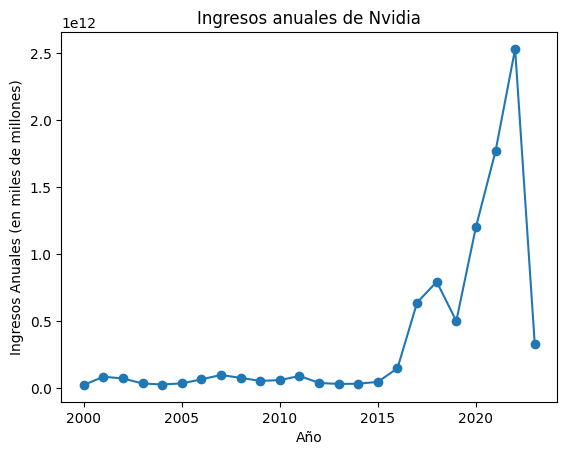

In [325]:
# Crear el gráfico
plt.plot(nvda_ingresos['Año'], nvda_ingresos['Ingresos Anuales'], marker='o')

# Establecer el título del gráfico
plt.title('Ingresos anuales de Nvidia')

# Establecer los nombres de los ejes
plt.xlabel('Año')
plt.ylabel('Ingresos Anuales (en miles de millones)')

# Mostrar el gráfico
plt.show()


Una tasa de crecimiento del 11.86% durante 23 años es un resultado positivo, ya que indica un aumento constante en los ingresos de la empresa durante un período prolongado de tiempo. 

**KPI 2: Retorno diario (ROI)**

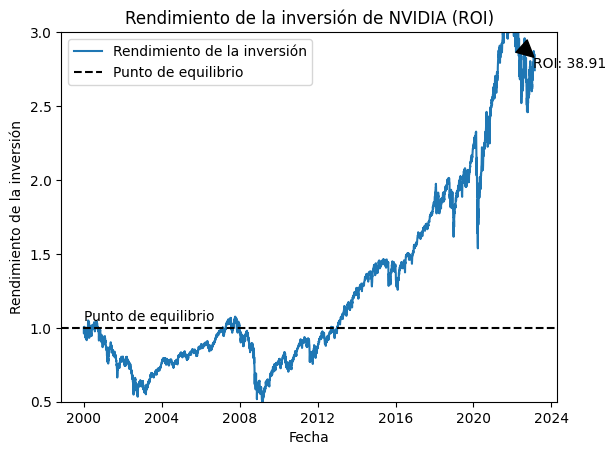

In [326]:
# Calcular ROI
inversion_inicial = 10000
valor_final = df_sp500['Cierre'].iloc[-1] * 100
roi = (valor_final - inversion_inicial) / inversion_inicial

# Crear gráfico
plt.plot(df_sp500.index, df_sp500['Cierre'] / df_sp500['Cierre'].iloc[0])
plt.xlabel('Fecha')
plt.ylabel('Rendimiento de la inversión')
plt.title('Rendimiento de la inversión de NVIDIA (ROI)')
plt.ylim(0.5, 3)
plt.axhline(y=1, color='black', linestyle='--')
plt.text(df_sp500.index[0], 1.03, 'Punto de equilibrio', ha='left', va='bottom')
plt.annotate('ROI: {:.2f}'.format(roi), xy=(df_sp500.index[-10], df_sp500['Cierre'][-10] / df_sp500['Cierre'].iloc[0]), xytext=(df_sp500.index[-20], df_sp500['Cierre'][-20] / df_sp500['Cierre'].iloc[0]), arrowprops=dict(facecolor='black', shrink=0.05),)
plt.legend(['Rendimiento de la inversión', 'Punto de equilibrio', 'ROI'])
plt.show()

El ROI final es del 38%, lo que significa que después de un período de tiempo determinado, la inversión generó una ganancia del 38%. Si la línea de la inversión está por debajo de la línea de equilibrio, significa que la inversión no ha alcanzado su punto de equilibrio y ha generado pérdidas. Si está por encima de la línea de equilibrio, significa que la inversión ha generado ganancias.

**KPI 3: Relación precio-beneficio (P/E Ratio)**

In [90]:
url = 'https://www.alphavantage.co/query?function=OVERVIEW&symbol=NVDA&apikey=4S3HE1EGEK6HZNJS'

r = requests.get(url)
data_nvda = r.json()

In [292]:
# guardo el archivo de datos
with open('./data.json', 'w') as f:
    json.dump(data_nvda, f)

In [293]:
with open('./data.json') as f:
    data = json.load(f)

In [327]:

# Calcular el P/E ratio de NVIDIA
eps = float(data['EPS']) # Utilizamos el EPS reportado en el último trimestre
precio = df_nvidia['Cierre Ajustado'].iloc[-1] # Utilizamos el precio de cierre ajustado más reciente
pe_ratio = precio / eps

round(pe_ratio,2)

88.31

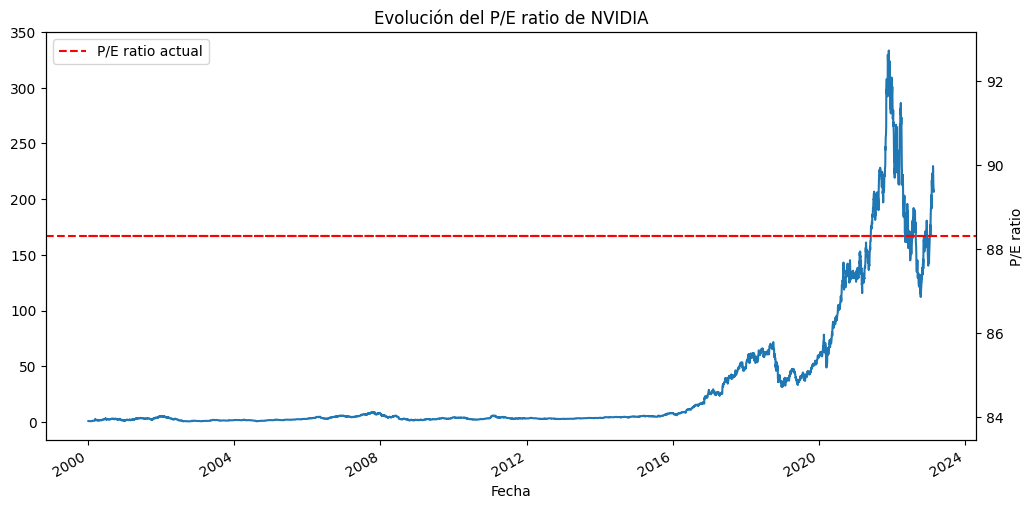

In [328]:
# Graficar el P/E ratio de NVIDIA en el tiempo
fig, ax = plt.subplots(figsize=(12, 6))
df_nvidia['Cierre Ajustado'].plot(ax=ax, label='Precio de cierre ajustado')
ax2 = ax.twinx()
ax2.set_ylabel('P/E ratio')
ax2.plot(df_nvidia.index, [pe_ratio] * len(df_nvidia.index), 'r--', label='P/E ratio actual')
#ax2.plot(df_nvidia.index, df_nvidia['TrailingPE'], label='P/E ratio histórico')
ax2.axhline(y=pe_ratio, color='r', linestyle='--')
ax2.legend(loc='upper left')
plt.title('Evolución del P/E ratio de NVIDIA')
plt.show()

Con un ROI del 38% y una tasa de crecimiento del 11%, tenemos un indicador sólido de que la empresa está generando un alto retorno para sus inversores y que se espera que continúe creciendo en el futuro. Además, aunque el P/E ratio de 88,34 pueda parecer elevado, en realidad indica que los inversores tienen una alta expectativa de crecimiento futuro para la empresa y están dispuestos a pagar un precio alto por cada unidad de ganancias.

En general, estos indicadores sugieren que la empresa tiene un alto potencial de crecimiento y rentabilidad para los inversores que estén dispuestos a invertir a largo plazo. 

**¿Que dia mejor invertir?**

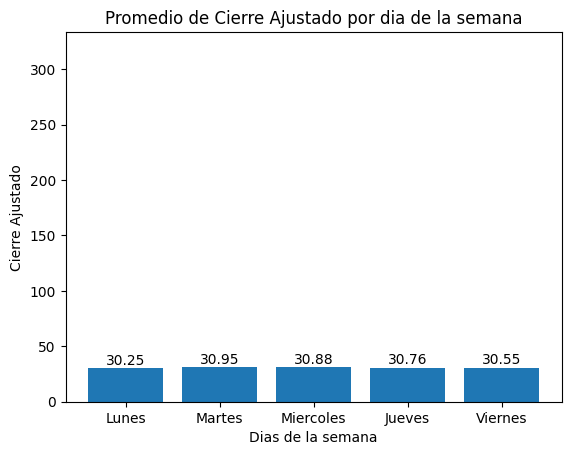

In [303]:
df_nvidia['Dias_de_semana'] = df_nvidia.index.weekday
promedio_dias_semana = df_nvidia.groupby('Dias_de_semana')['Cierre Ajustado'].mean()

plt.bar(promedio_dias_semana.index, promedio_dias_semana.values)
plt.xticks([0, 1, 2, 3, 4], ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes'])
plt.ylim([0, df_nvidia['Cierre Ajustado'].max() * 1.0])

for i, v in enumerate(promedio_dias_semana.values):
    plt.text(i, v + 0.01 * df_nvidia['Cierre Ajustado'].max(), f'{v:.2f}', ha='center')
    
plt.title('Promedio de Cierre Ajustado por dia de la semana')
plt.xlabel('Dias de la semana')
plt.ylabel('Cierre Ajustado')
plt.show()

Este gráfico podría ayudarte a identificar qué días de la semana históricamente han tenido un mejor rendimiento para invertir en Nvidia. En el eje x del gráfico se muestran los días de la semana y en el eje y se muestra el promedio del precio de cierre ajustado para cada día de la semana en el período de tiempo que se haya utilizado para construir el DataFrame.

Si observas que un día en particular ha tenido un promedio de cierre ajustado significativamente más alto que los demás días de la semana, entonces podría ser una buena señal para invertir en Nvidia en ese día de la semana en particular

**Se guardan los archivos modificados**

In [330]:
df_sp500.to_csv('./sp500_ETL.csv')

In [331]:
df_nvidia.to_csv('./nvidia.csv')